# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [6]:
tips = tips[tips['tip_pct']<.5]

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.11e-14
Time:                        16:39:03   Log-Likelihood:                 336.23
No. Observations:                 242   AIC:                            -668.5
Df Residuals:                     240   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.38

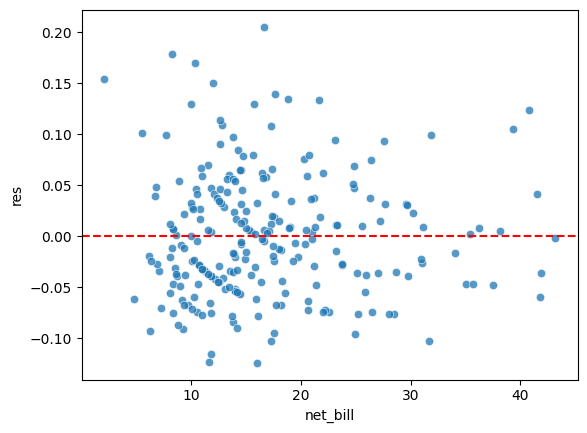

In [8]:
reg = smf.ols('tip_pct ~  np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

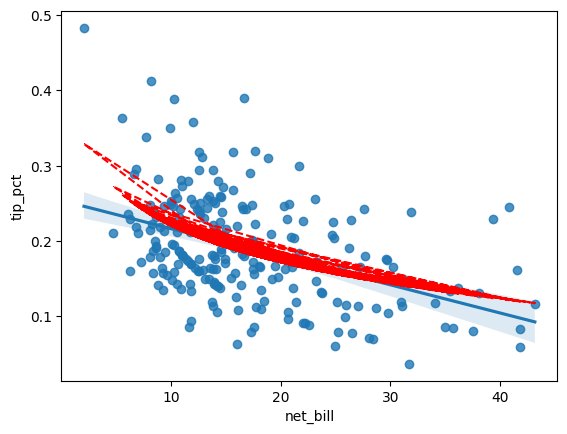

In [9]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.09e-12
Time:                        16:40:33   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

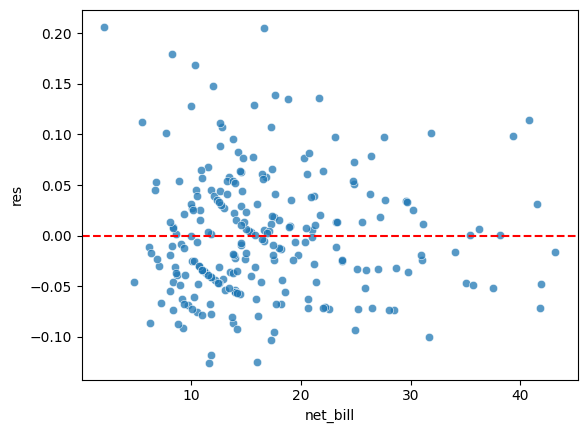

In [11]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

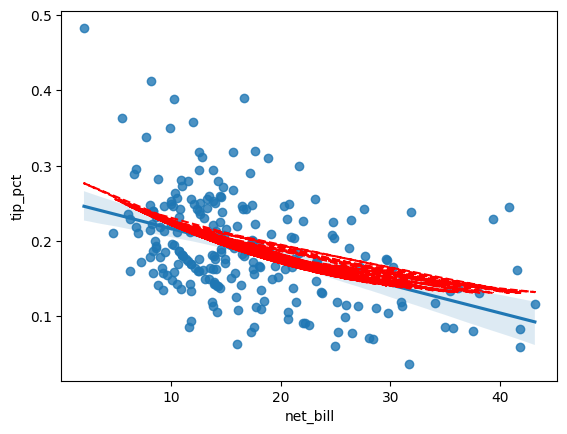

In [12]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.214
Model:                              OLS   Adj. R-squared:                  0.211
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Sat, 10 Aug 2024   Prob (F-statistic):           3.09e-14
Time:                          16:42:51   Log-Likelihood:                 36.609
No. Observations:                   242   AIC:                            -69.22
Df Residuals:                       240   BIC:                            -62.24
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.032

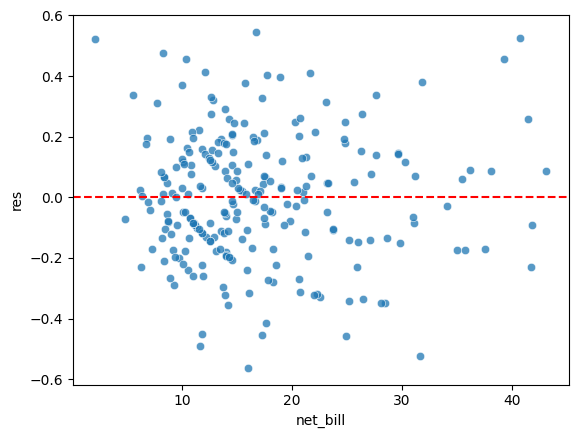

In [13]:
reg = smf.ols('np.log(tip_pct+.1) ~  net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [15]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

0.1966375835224211

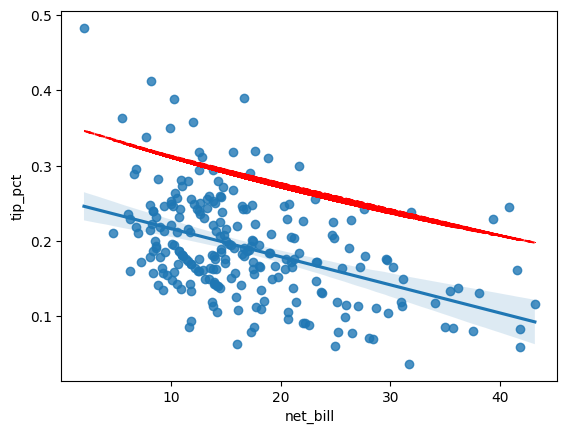

In [17]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.225
Method:                   Least Squares   F-statistic:                     70.94
Date:                  Sat, 10 Aug 2024   Prob (F-statistic):           3.39e-15
Time:                          16:50:06   Log-Likelihood:                 38.806
No. Observations:                   242   AIC:                            -73.61
Df Residuals:                       240   BIC:                            -66.63
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

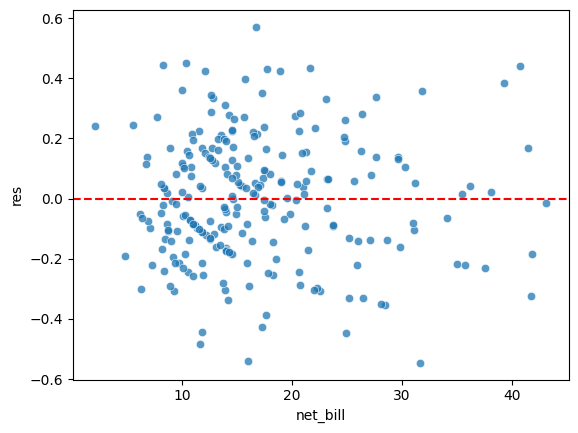

In [25]:
reg = smf.ols('np.log(tip_pct+.1) ~  np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [26]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

0.22625357585036054

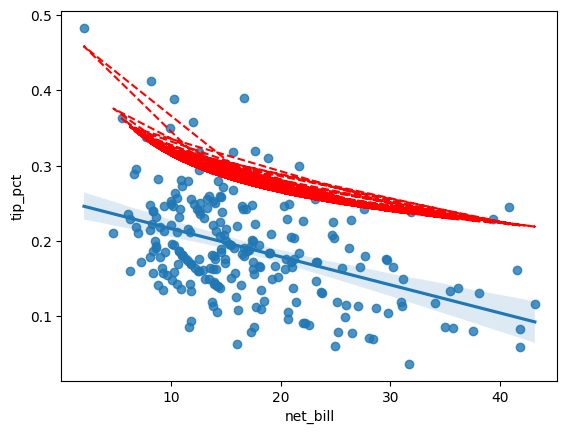

In [27]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

O primeiro modelo